In [23]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [24]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    File_data= np.loadtxt(data_path, dtype = float, delimiter=',').reshape(-1, 2)
    return File_data

In [25]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    if init_centers is None:
        centers = data[np.random.choice(data.shape[0], size=K, replace=False)]  
    else:
        centers=np.array(init_centers)
    return centers

In [26]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    ones = np.ones((1, len(data)))
    return ones

In [27]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    distances = np.zeros((len(data), len(centers)))
    for i in range(len(data)):  
        for j in range(len(centers)):  
            distances[i, j] = np.sqrt(np.sum((data[i, :] - centers[j, :])**2))
    
    return distances

In [28]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    newlabel=np.argmin(distances,axis=1)
    return newlabel

In [29]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
   new_centres=[]
   for i in range(K):
      arr=np.where(labels==i)[0]
      mean_cluster=np.mean(data[arr], axis=0)
      new_centres.append(mean_cluster)
   return np.array(new_centres)

In [30]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    if np.array_equal(labels1, labels2) :
        return True
    return False

In [31]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [32]:
### TODO 7
def visualise(data_path, labels, centers):
    points=load_data(data_path)
    
    plt.scatter(points[:,0], points[:,1], color="blue", marker="o", s=50)
    plt.scatter(centers[:,0], centers[:,1], color="darkorange", marker="*", s=150)

    plt.title('K-means clustering')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.savefig('kmeans.png')

    return plt

Time taken for the algorithm to converge: 0.0011420249938964844


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/pyplot.py'>

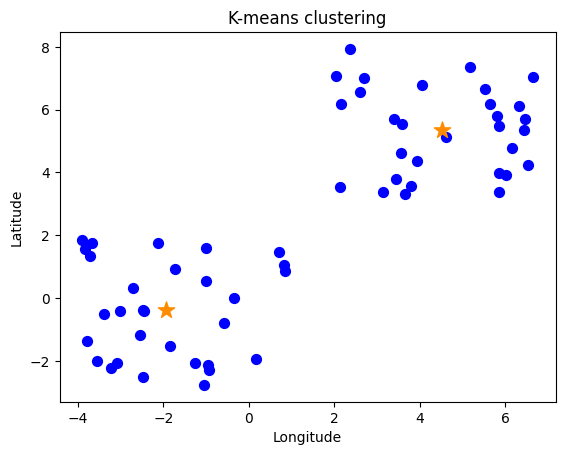

In [33]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)